# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.136281e+01     7.031609e+00
 * time: 0.004303932189941406
     1     2.862207e+01     6.917447e+00
 * time: 0.012846946716308594
     2     2.333996e+01     1.055732e+01
 * time: 0.03341102600097656
     3     1.380610e+01     3.346449e+00
 * time: 0.05745196342468262
     4     1.126166e+01     1.487277e+00
 * time: 0.07771897315979004
     5     1.039320e+01     1.141864e+00
 * time: 0.0976569652557373
     6     9.789184e+00     2.509198e+00
 * time: 0.11362099647521973
     7     9.304017e+00     9.926731e-01
 * time: 0.12947392463684082
     8     9.002947e+00     5.776052e-01
 * time: 0.14551711082458496
     9     8.933901e+00     1.312295e+00
 * time: 0.15763592720031738
    10     8.860188e+00     8.662554e-01
 * time: 0.17348098754882812
    11     8.783276e+00     8.791245e-01
 * time: 0.1857619285583496
    12     8.680297e+00     4.973966e-01
 * time: 0.2722511291503906
    13     8.625390e+00     6.146072e-01
 * time: 

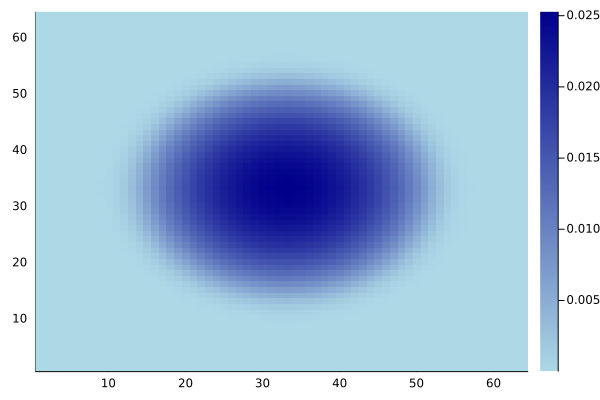

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)